In [1]:
!pip install matplotlib numpy seaborn

In [6]:
import matplotlib.pyplot as plt 

# initial state
v0 = -55.0
u0 = 0.0

# params
v_thresh = 30.0  # as per Izhikevich paper
a = 0.02
b = 0.2
c = -65.0
d = 8.0
I = 50.0

# time config
delta_t = 1.0 / 200.0
start = 0.0
end = 100.0

def run(start_time, end_time, v0, u0, a, b, c, d, I, v_thresh):
    vs = []
    times = list(range(int(start_time), int(end_time)))
    spike_times = []
    t = start_time

    v = v0
    u = u0
    while t < end_time:
        vs.append(v)
        dv = (0.04 * v**2) + (5.0 * v) + 140.0 - u
        du = a * ((b * v) - u)

        # apply a voltage current during this time
        if t > 20.0 and t < 45.0:
            dv += I

        v += dv * delta_t
        u += du * delta_t 

        if v >= v_thresh:
            # spiking condition met
            spike_times.append(t)

            # reset 
            v = c 
            u = u + d 

        t += delta_t

    return {
        'v': vs,
        'spike_times': spike_times}

In [7]:
results = run(start, end, v0, u0, a, b, c, d, I, v_thresh)

In [8]:
results

{'v': [-55.0,
  -55.07,
  -55.14020352,
  -55.210609192704595,
  -55.28121562966659,
  -55.352021421330825,
  -55.42302513708223,
  -55.4942253252981,
  -55.56562051340472,
  -55.63720920793813,
  -55.70898989460936,
  -55.780961038373874,
  -55.85312108350539,
  -55.925468453674064,
  -55.998001552029,
  -56.0707187612852,
  -56.14361844381483,
  -56.21669894174292,
  -56.289958577047464,
  -56.36339565166392,
  -56.437008447594124,
  -56.51079522701961,
  -56.58475423241934,
  -56.6588836866919,
  -56.733181793282014,
  -56.807646736311554,
  -56.88227668071491,
  -56.95706977237876,
  -57.03202413828622,
  -57.1071378866654,
  -57.18240910714229,
  -57.25783587089804,
  -57.33341623083052,
  -57.409148221720244,
  -57.48502986040059,
  -57.56105914593227,
  -57.63723405978212,
  -57.713552566006065,
  -57.79001261143632,
  -57.866612125872784,
  -57.94334902227858,
  -58.02022119697973,
  -58.097226529868905,
  -58.174362884613245,
  -58.25162810886623,
  -58.3290200344835,
  -58.40

<Axes: >

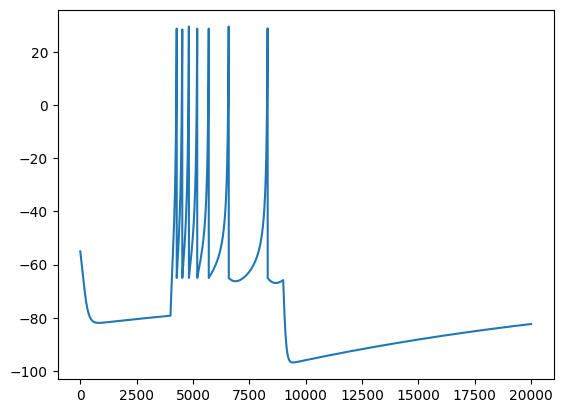

In [9]:
import seaborn as sns


sns.lineplot(results['v'])

In [10]:
def parameter_scan(n_iter, p):
    output = {}
    for n in range(n_iter):
        results = run(start, end, v0+p, u0+p, a+p, b+p, c+p, d+p, I+p, v_thresh)
        output[str(n)] = results
    return output
        

In [13]:
n_iterations = 1000
p = 0.1
scan = parameter_scan(n_iterations, p)

In [ ]:
import matplotlib.pyplot as plt 


for step in scan.keys():
    v_data = scan[step]['v']
    sns.lineplot(v_data, label=step)

plt.title(f"Voltage potential over time with purturbation parameter {p}")
plt.show()

KeyboardInterrupt: 